In [1]:
import pandas as pd
import os

In [2]:
import numpy as np

def rank_indices(y_score):
    return np.argsort(y_score)[::-1]  # Sort in descending order

# Example usage:
y_score = [0.2, 0.8, 0.5, 0.9]
ranked_indices = rank_indices(y_score)
print(ranked_indices)  # Output: [3 1 2 0]


[3 1 2 0]


In [7]:
root = '/itf-fi-ml/shared/users/ziyuzh/svm/results/uniport_2019_posbag_full'
top = False
if top == True:
    num = 12
all_results = []
counter = 0
for disease in os.listdir(root):
    if disease.startswith('ICD'):
        counter += 1
        result_df = pd.read_csv(os.path.join(root,disease))
        # Calculate mean metrics
        # mean_df = result_df.groupby(['method'])[["recall", "precision", 'top_recall_10', 'top_precision_10', 'max_precision_10','top_recall_30', 'top_precision_30', 'max_precision_30','auroc',"rank_ratio",'bedroc_1','bedroc_5','bedroc_10','bedroc_30']].mean().reset_index()
        # mean_df = result_df.groupby(['method'])[['top_recall_10', 'top_precision_10', 'max_precision_10','top_recall_30', 'top_precision_30', 'max_precision_30','auroc',"rank_ratio",'bedroc_1','bedroc_5','bedroc_10','bedroc_30']].mean().reset_index()
        # mean_df = result_df.groupby(['method'])[['top_recall_25','top_recall_300','top_recall_10%', 'top_precision_10%', 'max_precision_10%','top_recall_30%', 'top_precision_30%', 'max_precision_30%','auroc',"rank_ratio",'bedroc_1','bedroc_5','bedroc_10','bedroc_30']].mean().reset_index()

        # mean_df = result_df.groupby(['method'])[['top_recall_25','top_recall_300','top_recall_10%', 'top_precision_10%', 'max_precision_10%','top_recall_30%', 'top_precision_30%', 'max_precision_30%','er_100','er_1000','er_10%','er_30%','auroc',"rank_ratio",'bedroc_1','bedroc_5','bedroc_10','bedroc_30']].mean().reset_index()
        mean_df = result_df.groupby(['method'])[['top_recall_25','top_recall_300','top_recall_10%', 'top_precision_10%', 'max_precision_10%','top_recall_30%', 'top_precision_30%', 'max_precision_30%','pm_0.5%','pm_1%','pm_5%','pm_10%','pm_15%','pm_20%','pm_25%','pm_30%','auroc',"rank_ratio",'bedroc_1','bedroc_5','bedroc_10','bedroc_30']].mean().reset_index()

        # Add disease information
        mean_df['disease'] = disease.split('.')[0]

        # Append to all_results list
        all_results.append(mean_df)
    if top == True:
        if counter == num:
            break
# Concatenate all results into a single DataFrame
final_result = pd.concat(all_results, ignore_index=True)
if top == True:
    final_result.to_csv(os.path.join(root,f'all_disease_{num}.csv'),index=False)
else:
    final_result.to_csv(os.path.join(root,'all_disease.csv'),index=False)


In [3]:
results = pd.read_csv(os.path.join(root,'all_disease.csv'))
results.head(3)

,method,top_recall_10,top_precision_10,max_precision_10,top_recall_30,top_precision_30,max_precision_30,auroc,rank_ratio,bedroc_1,bedroc_5,bedroc_10,bedroc_30,disease
0,pseudo_labeling1auroc,0.500000,0.001747,0.003495,0.733333,0.000856,0.001165,0.790116,0.21002,0.116941,0.290849,0.380688,0.552654,ICD10_E10
1,random_negativeauroc,0.566667,0.001953,0.003495,0.771429,0.000891,0.001165,0.804597,0.19552,0.134563,0.317160,0.415752,0.588117,ICD10_E10
2,pseudo_labeling1auroc,0.280000,0.000718,0.002564,0.480000,0.000410,0.000855,0.649793,0.35700,0.020282,0.067647,0.134886,0.327490,ICD10_C16


In [8]:
def create_summary(results,col_name):
    # Create an empty list to store results
    summary_list = []

    # Grouping by 'method' and calculating mean and std for selected metrics
    for method, subdf in results.groupby(col_name):
        # mean_values = subdf.iloc[:, 2:7].mean()  # Selecting all metric columns
        # std_values = subdf.iloc[:, 2:7].std()

        # Append the results to the list as a dictionary
        # summary_list.append({
        #     'method': method,
        #     'recall_mean': mean_values['recall'], 'recall_std': std_values['recall'],
        #     'precision_mean': mean_values['precision'], 'precision_std': std_values['precision'],
        #     'f1-score_mean': mean_values['f1-score'], 'f1-score_std': std_values['f1-score'],
        #     'auroc_mean': mean_values['auroc'], 'auroc_std': std_values['auroc'],
        #     'rank_ratio_mean': mean_values['rank_ratio'], 'rank_ratio_std': std_values['rank_ratio'],
        # })

        # mean_values = subdf.iloc[:, 1:10].mean()  # Selecting all metric columns
        # std_values = subdf.iloc[:, 1:10].std()
        # summary_list.append({
        #     'method': method,
        #     'recall_mean': mean_values['recall'], 'recall_std': std_values['recall'],
        #     'precision_mean': mean_values['precision'], 'precision_std': std_values['precision'],
        #     'f1-score_mean': mean_values['f1-score'], 'f1-score_std': std_values['f1-score'],
        #     'auroc_mean': mean_values['auroc'], 'auroc_std': std_values['auroc'],
        #     'rank_ratio_mean': mean_values['rank_ratio'], 'rank_ratio_std': std_values['rank_ratio'],
        #     'bedroc_1_mean': mean_values['bedroc_1'], 'bedroc_1_std': std_values['bedroc_1'],
        #     'bedroc_5_mean': mean_values['bedroc_5'], 'bedroc_5_std': std_values['bedroc_5'],
        #     'bedroc_10_mean': mean_values['bedroc_10'], 'bedroc_10_std': std_values['bedroc_10'],
        #     'bedroc_30_mean': mean_values['bedroc_30'], 'bedroc_30_std': std_values['bedroc_30'],
        # })
        # mean_values = subdf.iloc[:, 1:15].mean()  # Selecting all metric columns
        # std_values = subdf.iloc[:, 1:15].std()
        # summary_list.append({
        #     'method': method,
        #     'recall_mean': mean_values['recall'], 'recall_std': std_values['recall'],
        #     'precision_mean': mean_values['precision'], 'precision_std': std_values['precision'],
        #     'top_recall_10_mean': mean_values['top_recall_10'], 'top_recall_10_std': std_values['top_recall_10'],
        #     'top_precision_10_mean': mean_values['top_precision_10'], 'top_precision_10_std': std_values['top_precision_10'],
        #     'max_precision_10_mean': mean_values['max_precision_10'], 'max_precision_10_std': std_values['max_precision_10'],
        #     'top_recall_30_mean': mean_values['top_recall_30'], 'top_recall_10_std': std_values['top_recall_30'],
        #     'top_precision_30_mean': mean_values['top_precision_30'], 'top_precision_10_std': std_values['top_precision_30'],
        #     'max_precision_30_mean': mean_values['max_precision_30'], 'max_precision_10_std': std_values['max_precision_30'],
        #     'auroc_mean': mean_values['auroc'], 'auroc_std': std_values['auroc'],
        #     'rank_ratio_mean': mean_values['rank_ratio'], 'rank_ratio_std': std_values['rank_ratio'],
        #     'bedroc_1_mean': mean_values['bedroc_1'], 'bedroc_1_std': std_values['bedroc_1'],
        #     'bedroc_5_mean': mean_values['bedroc_5'], 'bedroc_5_std': std_values['bedroc_5'],
        #     'bedroc_10_mean': mean_values['bedroc_10'], 'bedroc_10_std': std_values['bedroc_10'],
        #     'bedroc_30_mean': mean_values['bedroc_30'], 'bedroc_30_std': std_values['bedroc_30'],
        # })

        # mean_values = subdf.iloc[:, 1:13].mean()  # Selecting all metric columns
        # std_values = subdf.iloc[:, 1:13].std()
        # summary_list.append({
        #     'method': method,
        #     'top_recall_10_mean': mean_values['top_recall_10'], 'top_recall_10_std': std_values['top_recall_10'],
        #     'top_precision_10_mean': mean_values['top_precision_10'], 'top_precision_10_std': std_values['top_precision_10'],
        #     'max_precision_10_mean': mean_values['max_precision_10'], 'max_precision_10_std': std_values['max_precision_10'],
        #     'top_recall_30_mean': mean_values['top_recall_30'], 'top_recall_10_std': std_values['top_recall_30'],
        #     'top_precision_30_mean': mean_values['top_precision_30'], 'top_precision_10_std': std_values['top_precision_30'],
        #     'max_precision_30_mean': mean_values['max_precision_30'], 'max_precision_10_std': std_values['max_precision_30'],
        #     'auroc_mean': mean_values['auroc'], 'auroc_std': std_values['auroc'],
        #     'rank_ratio_mean': mean_values['rank_ratio'], 'rank_ratio_std': std_values['rank_ratio'],
        #     'bedroc_1_mean': mean_values['bedroc_1'], 'bedroc_1_std': std_values['bedroc_1'],
        #     'bedroc_5_mean': mean_values['bedroc_5'], 'bedroc_5_std': std_values['bedroc_5'],
        #     'bedroc_10_mean': mean_values['bedroc_10'], 'bedroc_10_std': std_values['bedroc_10'],
        #     'bedroc_30_mean': mean_values['bedroc_30'], 'bedroc_30_std': std_values['bedroc_30'],
        # })

        # mean_values = subdf.iloc[:, 1:15].mean()  # Selecting all metric columns
        # std_values = subdf.iloc[:, 1:15].std()
        # summary_list.append({
        #     'method': method,
        #     'top_recall_25_mean': mean_values['top_recall_25'], 'top_recall_25_std': std_values['top_recall_25'],
        #     'top_recall_300_mean': mean_values['top_recall_300'], 'top_recall_300_std': std_values['top_recall_300'],
        #     'top_recall_10_mean': mean_values['top_recall_10%'], 'top_recall_10_std': std_values['top_recall_10%'],
        #     'top_precision_10_mean': mean_values['top_precision_10%'], 'top_precision_10_std': std_values['top_precision_10%'],
        #     'max_precision_10_mean': mean_values['max_precision_10%'], 'max_precision_10_std': std_values['max_precision_10%'],
        #     'top_recall_30_mean': mean_values['top_recall_30%'], 'top_recall_10_std': std_values['top_recall_30%'],
        #     'top_precision_30_mean': mean_values['top_precision_30%'], 'top_precision_10_std': std_values['top_precision_30%'],
        #     'max_precision_30_mean': mean_values['max_precision_30%'], 'max_precision_10_std': std_values['max_precision_30%'],
        #     'auroc_mean': mean_values['auroc'], 'auroc_std': std_values['auroc'],
        #     'rank_ratio_mean': mean_values['rank_ratio'], 'rank_ratio_std': std_values['rank_ratio'],
        #     'bedroc_1_mean': mean_values['bedroc_1'], 'bedroc_1_std': std_values['bedroc_1'],
        #     'bedroc_5_mean': mean_values['bedroc_5'], 'bedroc_5_std': std_values['bedroc_5'],
        #     'bedroc_10_mean': mean_values['bedroc_10'], 'bedroc_10_std': std_values['bedroc_10'],
        #     'bedroc_30_mean': mean_values['bedroc_30'], 'bedroc_30_std': std_values['bedroc_30'],
        # })


        # mean_values = subdf.iloc[:, 1:19].mean()  # Selecting all metric columns
        # std_values = subdf.iloc[:, 1:19].std()
        # summary_list.append({
        #     'method': method,
        #     'top_recall_25_mean': mean_values['top_recall_25'], 'top_recall_25_std': std_values['top_recall_25'],
        #     'top_recall_300_mean': mean_values['top_recall_300'], 'top_recall_300_std': std_values['top_recall_300'],
        #     'top_recall_10_mean': mean_values['top_recall_10%'], 'top_recall_10_std': std_values['top_recall_10%'],
        #     'top_precision_10_mean': mean_values['top_precision_10%'], 'top_precision_10_std': std_values['top_precision_10%'],
        #     'max_precision_10_mean': mean_values['max_precision_10%'], 'max_precision_10_std': std_values['max_precision_10%'],
        #     'top_recall_30_mean': mean_values['top_recall_30%'], 'top_recall_10_std': std_values['top_recall_30%'],
        #     'top_precision_30_mean': mean_values['top_precision_30%'], 'top_precision_10_std': std_values['top_precision_30%'],
        #     'max_precision_30_mean': mean_values['max_precision_30%'], 'max_precision_10_std': std_values['max_precision_30%'],
        #     'er_100_mean': mean_values['er_100'], 'er_100_std': std_values['er_100'],
        #     'er_1000_mean': mean_values['er_1000'], 'er_1000_std': std_values['er_1000'],
        #     'er_10%': mean_values['er_10%'], 'er_10%_std': std_values['er_10%'],
        #     'er_30%': mean_values['er_30%'], 'er_30%_std': std_values['er_30%'],
        #     'auroc_mean': mean_values['auroc'], 'auroc_std': std_values['auroc'],
        #     'rank_ratio_mean': mean_values['rank_ratio'], 'rank_ratio_std': std_values['rank_ratio'],
        #     'bedroc_1_mean': mean_values['bedroc_1'], 'bedroc_1_std': std_values['bedroc_1'],
        #     'bedroc_5_mean': mean_values['bedroc_5'], 'bedroc_5_std': std_values['bedroc_5'],
        #     'bedroc_10_mean': mean_values['bedroc_10'], 'bedroc_10_std': std_values['bedroc_10'],
        #     'bedroc_30_mean': mean_values['bedroc_30'], 'bedroc_30_std': std_values['bedroc_30'],
        # })

        mean_values = subdf.iloc[:, 1:23].mean()  # Selecting all metric columns
        std_values = subdf.iloc[:, 1:23].std()
        summary_list.append({
            'method': method,
            'top_recall_25_mean': mean_values['top_recall_25'], 'top_recall_25_std': std_values['top_recall_25'],
            'top_recall_300_mean': mean_values['top_recall_300'], 'top_recall_300_std': std_values['top_recall_300'],
            'top_recall_10_mean': mean_values['top_recall_10%'], 'top_recall_10_std': std_values['top_recall_10%'],
            'top_precision_10_mean': mean_values['top_precision_10%'], 'top_precision_10_std': std_values['top_precision_10%'],
            'max_precision_10_mean': mean_values['max_precision_10%'], 'max_precision_10_std': std_values['max_precision_10%'],
            'top_recall_30_mean': mean_values['top_recall_30%'], 'top_recall_10_std': std_values['top_recall_30%'],
            'top_precision_30_mean': mean_values['top_precision_30%'], 'top_precision_10_std': std_values['top_precision_30%'],
            'max_precision_30_mean': mean_values['max_precision_30%'], 'max_precision_10_std': std_values['max_precision_30%'],
            'pm_0.5%': mean_values['pm_0.5%'], 'pm_0.5%_std': std_values['pm_0.5%'],
            'pm_1%': mean_values['pm_1%'], 'pm_1%_std': std_values['pm_1%'],
            'pm_5%': mean_values['pm_5%'], 'pm_5%_std': std_values['pm_5%'],
            'pm_10%': mean_values['pm_10%'], 'pm_10%_std': std_values['pm_10%'],
            'pm_15%': mean_values['pm_15%'], 'pm_15%_std': std_values['pm_15%'],            
            'pm_20%': mean_values['pm_20%'], 'pm_20%_std': std_values['pm_20%'],
            'pm_25%': mean_values['pm_25%'], 'pm_1%_std': std_values['pm_25%'],
            'pm_30%': mean_values['pm_30%'], 'pm_30%_std': std_values['pm_30%'],
            'auroc_mean': mean_values['auroc'], 'auroc_std': std_values['auroc'],
            'rank_ratio_mean': mean_values['rank_ratio'], 'rank_ratio_std': std_values['rank_ratio'],
            'bedroc_1_mean': mean_values['bedroc_1'], 'bedroc_1_std': std_values['bedroc_1'],
            'bedroc_5_mean': mean_values['bedroc_5'], 'bedroc_5_std': std_values['bedroc_5'],
            'bedroc_10_mean': mean_values['bedroc_10'], 'bedroc_10_std': std_values['bedroc_10'],
            'bedroc_30_mean': mean_values['bedroc_30'], 'bedroc_30_std': std_values['bedroc_30'],
        })

    # Convert the list of dictionaries into a DataFrame
    summary_df = pd.DataFrame(summary_list)
    return summary_df

In [34]:
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_2017_posbag_full/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

method_order = [
    'random_negativeauroc',
    'random_negative_bagging',
    'random_pos_negative_bagging'
]

# Convert 'method' column to categorical with specified order
all_sum['method'] = pd.Categorical(all_sum['method'], categories=method_order, ordered=True)

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)] \
                   .sort_values(by=['method', 'bedroc_1_mean'], ascending=[True, False]) \
                   .round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
1,random_negativeauroc,0.067,0.306,0.614,0.002,0.005,0.748,0.001,0.002,0.512,...,0.760,0.737,0.710,0.686,0.802,0.200,0.181,0.340,0.435,0.600
0,random_negative_bagging,0.095,0.263,0.594,0.002,0.005,0.743,0.001,0.002,0.509,...,0.766,0.741,0.715,0.687,0.804,0.196,0.167,0.312,0.409,0.586
2,random_pos_negative_bagging,0.076,0.331,0.570,0.002,0.005,0.742,0.001,0.002,0.435,...,0.738,0.716,0.697,0.675,0.803,0.197,0.180,0.345,0.433,0.594


In [41]:
final_result.sort_values(by=['auroc'], ascending=[False])

,method,top_recall_25,top_recall_300,top_recall_10%,top_precision_10%,max_precision_10%,top_recall_30%,top_precision_30%,max_precision_30%,pm_0.5%,...,pm_20%,pm_25%,pm_30%,auroc,rank_ratio,bedroc_1,bedroc_5,bedroc_10,bedroc_30,disease
135,random_negative_bagging,1.000000,1.000000,1.000000,0.000521,0.000521,1.000000,0.000173,0.000173,0.995081,...,0.833391,0.800050,0.769274,0.999896,0.0002,9.833956e-01,0.996655,0.998326,0.999446,ICD10_I63
136,random_negativeauroc,1.000000,1.000000,1.000000,0.000521,0.000521,1.000000,0.000173,0.000173,0.995081,...,0.833391,0.800050,0.769274,0.999480,0.0006,9.196894e-01,0.983385,0.991658,0.997232,ICD10_I63
122,random_pos_negative_bagging,1.000000,1.000000,1.000000,0.000522,0.000522,1.000000,0.000174,0.000174,0.995120,...,0.833384,0.800025,0.769265,0.999165,0.0009,8.743215e-01,0.973480,0.986651,0.995564,ICD10_M32
137,random_pos_negative_bagging,1.000000,1.000000,1.000000,0.000521,0.000521,1.000000,0.000173,0.000173,0.995081,...,0.833391,0.800050,0.769274,0.999011,0.0010,8.529396e-01,0.968668,0.984209,0.994748,ICD10_I63
120,random_negative_bagging,1.000000,1.000000,1.000000,0.000522,0.000522,1.000000,0.000174,0.000174,0.995120,...,0.833384,0.800025,0.769265,0.999009,0.0010,8.525787e-01,0.968586,0.984168,0.994734,ICD10_M32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,random_negativeauroc,0.000000,0.000000,0.142857,0.000520,0.003640,0.428571,0.000520,0.001213,0.000000,...,0.588298,0.533346,0.588298,0.493598,0.5064,3.314843e-08,0.008270,0.048795,0.216534,ICD10_G24
13,random_negativeauroc,0.000000,0.000000,0.500000,0.000520,0.001040,0.500000,0.000173,0.000347,0.000000,...,0.714328,0.666724,0.625028,0.493031,0.5070,9.005951e-05,0.089047,0.211005,0.376349,ICD10_D83
80,random_pos_negative_bagging,0.111111,0.222222,0.222222,0.001041,0.004683,0.333333,0.000520,0.001560,0.978466,...,0.526381,0.470588,0.526359,0.455099,0.5449,1.802706e-01,0.212266,0.218124,0.256432,ICD10_F72
6,random_negative_bagging,0.000000,0.000000,0.062500,0.000529,0.008461,0.312500,0.000881,0.002819,0.000000,...,0.483884,0.500013,0.510217,0.455022,0.5450,1.757501e-04,0.022538,0.057655,0.174524,ICD10_F31


In [42]:
final_result.sort_values(by=['bedroc_1'], ascending=[False])

,method,top_recall_25,top_recall_300,top_recall_10%,top_precision_10%,max_precision_10%,top_recall_30%,top_precision_30%,max_precision_30%,pm_0.5%,...,pm_20%,pm_25%,pm_30%,auroc,rank_ratio,bedroc_1,bedroc_5,bedroc_10,bedroc_30,disease
135,random_negative_bagging,1.0,1.0,1.0,0.000521,0.000521,1.0,0.000173,0.000173,0.995081,...,0.833391,0.800050,0.769274,0.999896,0.0002,9.833956e-01,0.996655,0.998326,0.999446,ICD10_I63
136,random_negativeauroc,1.0,1.0,1.0,0.000521,0.000521,1.0,0.000173,0.000173,0.995081,...,0.833391,0.800050,0.769274,0.999480,0.0006,9.196894e-01,0.983385,0.991658,0.997232,ICD10_I63
122,random_pos_negative_bagging,1.0,1.0,1.0,0.000522,0.000522,1.0,0.000174,0.000174,0.995120,...,0.833384,0.800025,0.769265,0.999165,0.0009,8.743215e-01,0.973480,0.986651,0.995564,ICD10_M32
137,random_pos_negative_bagging,1.0,1.0,1.0,0.000521,0.000521,1.0,0.000173,0.000173,0.995081,...,0.833391,0.800050,0.769274,0.999011,0.0010,8.529396e-01,0.968668,0.984209,0.994748,ICD10_I63
120,random_negative_bagging,1.0,1.0,1.0,0.000522,0.000522,1.0,0.000174,0.000174,0.995120,...,0.833384,0.800025,0.769265,0.999009,0.0010,8.525787e-01,0.968586,0.984168,0.994734,ICD10_M32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,random_pos_negative_bagging,0.0,0.0,0.0,0.000000,0.005379,0.3,0.000538,0.001793,0.000000,...,0.333274,0.444458,0.500022,0.531768,0.4683,6.155151e-15,0.000297,0.009059,0.133768,ICD10_F20
14,random_pos_negative_bagging,0.0,0.0,0.0,0.000000,0.001040,0.0,0.000000,0.000347,0.000000,...,0.000000,0.000000,0.000000,0.426439,0.5736,2.557525e-22,0.000027,0.003703,0.100725,ICD10_D83
76,random_negativeauroc,0.0,0.0,0.0,0.000000,0.000521,0.0,0.000000,0.000173,0.000000,...,0.000000,0.000000,0.000000,0.654439,0.3456,7.146928e-25,0.000015,0.003836,0.155978,ICD10_L80
77,random_pos_negative_bagging,0.0,0.0,0.0,0.000000,0.000521,0.0,0.000000,0.000173,0.000000,...,0.000000,0.000000,0.000000,0.629202,0.3708,1.232303e-26,0.000007,0.002555,0.135823,ICD10_L80


In [43]:
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_2017_full/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,random_negative_baggingauroc,0.064,0.335,0.640,0.002,0.005,0.761,0.001,0.002,0.530,...,0.769,0.738,0.72,0.694,0.818,0.182,0.186,0.359,0.457,0.619
1,random_negativeauroc,0.067,0.306,0.614,0.002,0.005,0.748,0.001,0.002,0.512,...,0.760,0.737,0.71,0.686,0.802,0.200,0.181,0.340,0.435,0.600


In [44]:
final_result.sort_values(by=['auroc'], ascending=[False])

,method,top_recall_25,top_recall_300,top_recall_10%,top_precision_10%,max_precision_10%,top_recall_30%,top_precision_30%,max_precision_30%,pm_0.5%,...,pm_20%,pm_25%,pm_30%,auroc,rank_ratio,bedroc_1,bedroc_5,bedroc_10,bedroc_30,disease
90,random_negative_baggingauroc,1.000000,1.000000,1.000000,0.000521,0.000521,1.000000,0.000173,0.000173,0.995081,...,0.833391,0.800050,0.769274,0.999740,0.0003,9.590044e-01,0.991658,0.995820,0.998615,ICD10_I63
91,random_negativeauroc,1.000000,1.000000,1.000000,0.000521,0.000521,1.000000,0.000173,0.000173,0.995081,...,0.833391,0.800050,0.769274,0.999480,0.0006,9.196894e-01,0.983385,0.991658,0.997232,ICD10_I63
81,random_negativeauroc,0.000000,1.000000,1.000000,0.000522,0.000522,1.000000,0.000174,0.000174,0.995120,...,0.833384,0.800025,0.769265,0.998696,0.0014,8.107018e-01,0.958873,0.979220,0.993077,ICD10_M32
80,random_negative_baggingauroc,0.000000,1.000000,1.000000,0.000522,0.000522,1.000000,0.000174,0.000174,0.995120,...,0.833384,0.800025,0.769265,0.998539,0.0015,7.905412e-01,0.954052,0.976756,0.992249,ICD10_M32
60,random_negative_baggingauroc,0.000000,1.000000,1.000000,0.000521,0.000521,1.000000,0.000174,0.000174,0.995077,...,0.833362,0.800033,0.769268,0.998125,0.0019,7.396272e-01,0.941426,0.970271,0.990065,ICD10_J80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,random_negativeauroc,0.166667,0.166667,0.166667,0.000520,0.003120,0.166667,0.000173,0.001040,0.971208,...,0.454571,0.399988,0.357147,0.501872,0.5825,1.701718e-01,0.167365,0.167016,0.166933,ICD10_F90
79,random_negativeauroc,0.000000,0.000000,0.000000,0.000000,0.005379,0.400000,0.000717,0.001793,0.000000,...,0.500000,0.545521,0.571494,0.500995,0.4990,1.118777e-12,0.000903,0.015827,0.148320,ICD10_F20
85,random_negativeauroc,0.000000,0.000000,0.142857,0.000520,0.003640,0.428571,0.000520,0.001213,0.000000,...,0.588298,0.533346,0.588298,0.493598,0.5064,3.314843e-08,0.008270,0.048795,0.216534,ICD10_G24
9,random_negativeauroc,0.000000,0.000000,0.500000,0.000520,0.001040,0.500000,0.000173,0.000347,0.000000,...,0.714328,0.666724,0.625028,0.493031,0.5070,9.005951e-05,0.089047,0.211005,0.376349,ICD10_D83


In [25]:
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/gene2vec_2017_posbag_full/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

method_order = [
    'random_negativeauroc',
    'random_negative_bagging',
    'random_pos_negative_bagging'
]

# Convert 'method' column to categorical with specified order
all_sum['method'] = pd.Categorical(all_sum['method'], categories=method_order, ordered=True)

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)] \
                   .sort_values(by=['method', 'bedroc_1_mean'], ascending=[True, False]) \
                   .round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
1,random_negativeauroc,0.006,0.052,0.249,0.001,0.007,0.541,0.001,0.002,0.162,...,0.518,0.539,0.550,0.551,0.669,0.336,0.020,0.084,0.150,0.336
0,random_negative_bagging,0.008,0.066,0.237,0.001,0.007,0.580,0.001,0.002,0.175,...,0.516,0.566,0.576,0.601,0.671,0.332,0.025,0.089,0.152,0.341
2,random_pos_negative_bagging,0.027,0.072,0.238,0.001,0.007,0.469,0.001,0.002,0.209,...,0.489,0.553,0.555,0.536,0.633,0.372,0.041,0.099,0.157,0.321


In [26]:
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/uniport_2017_posbag_full/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

method_order = [
    'random_negativeauroc',
    'random_negative_bagging',
    'random_pos_negative_bagging'
]

# Convert 'method' column to categorical with specified order
all_sum['method'] = pd.Categorical(all_sum['method'], categories=method_order, ordered=True)

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)] \
                   .sort_values(by=['method', 'bedroc_1_mean'], ascending=[True, False]) \
                   .round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
1,random_negativeauroc,0.022,0.121,0.303,0.001,0.006,0.529,0.001,0.002,0.318,...,0.578,0.585,0.560,0.555,0.679,0.324,0.059,0.140,0.203,0.371
0,random_negative_bagging,0.020,0.117,0.284,0.002,0.006,0.540,0.001,0.002,0.250,...,0.557,0.590,0.570,0.555,0.662,0.338,0.054,0.132,0.194,0.362
2,random_pos_negative_bagging,0.020,0.120,0.296,0.002,0.006,0.520,0.001,0.002,0.167,...,0.576,0.555,0.535,0.553,0.645,0.348,0.049,0.149,0.215,0.370


In [30]:
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/uniport_2017_full/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
1,random_negativeauroc,0.043,0.232,0.426,0.001,0.004,0.659,0.001,0.001,0.440,...,0.653,0.655,0.627,0.641,0.750,0.250,0.110,0.238,0.310,0.474
0,random_negative_baggingauroc,0.038,0.189,0.462,0.001,0.004,0.638,0.001,0.001,0.317,...,0.700,0.662,0.634,0.614,0.741,0.259,0.083,0.223,0.314,0.487


In [45]:

final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/esm2_2017_full/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,random_negative_baggingauroc,0.080,0.172,0.349,0.001,0.005,0.646,0.001,0.002,0.363,...,0.568,0.592,0.623,0.631,0.716,0.284,0.116,0.209,0.271,0.432
1,random_negativeauroc,0.063,0.159,0.358,0.001,0.005,0.612,0.001,0.002,0.278,...,0.576,0.594,0.621,0.622,0.725,0.275,0.092,0.185,0.253,0.427


In [27]:
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_2019_posbag_full/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

method_order = [
    'random_negativeauroc',
    'random_negative_bagging',
    'random_pos_negative_bagging'
]

# Convert 'method' column to categorical with specified order
all_sum['method'] = pd.Categorical(all_sum['method'], categories=method_order, ordered=True)

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)] \
                   .sort_values(by=['method', 'bedroc_1_mean'], ascending=[True, False]) \
                   .round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
1,random_negativeauroc,0.041,0.195,0.509,0.001,0.003,0.787,0.001,0.001,0.221,...,0.672,0.698,0.694,0.691,0.796,0.204,0.106,0.268,0.367,0.557
0,random_negative_bagging,0.006,0.229,0.541,0.001,0.003,0.732,0.001,0.001,0.266,...,0.647,0.653,0.671,0.646,0.784,0.219,0.115,0.270,0.367,0.549
2,random_pos_negative_bagging,0.027,0.176,0.502,0.001,0.003,0.779,0.001,0.001,0.221,...,0.630,0.687,0.661,0.676,0.799,0.201,0.085,0.253,0.358,0.556


In [31]:
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_2019_full/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,random_negative_baggingauroc,0.046,0.237,0.557,0.001,0.003,0.795,0.001,0.001,0.243,...,0.630,0.684,0.705,0.688,0.812,0.188,0.121,0.290,0.390,0.578
1,random_negativeauroc,0.041,0.195,0.509,0.001,0.003,0.787,0.001,0.001,0.221,...,0.672,0.698,0.694,0.691,0.796,0.204,0.106,0.268,0.367,0.557


In [29]:
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/bioconcept_2019_posbag_full/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

method_order = [
    'random_negativeauroc',
    'random_negative_bagging',
    'random_pos_negative_bagging'
]

# Convert 'method' column to categorical with specified order
all_sum['method'] = pd.Categorical(all_sum['method'], categories=method_order, ordered=True)

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)] \
                   .sort_values(by=['method', 'bedroc_1_mean'], ascending=[True, False]) \
                   .round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
1,random_negativeauroc,0.007,0.143,0.416,0.001,0.004,0.596,0.001,0.001,0.168,...,0.569,0.563,0.541,0.554,0.703,0.297,0.041,0.168,0.255,0.431
0,random_negative_bagging,0.013,0.132,0.382,0.001,0.004,0.591,0.001,0.001,0.226,...,0.538,0.526,0.576,0.565,0.679,0.321,0.048,0.153,0.233,0.408
2,random_pos_negative_bagging,0.002,0.124,0.404,0.001,0.004,0.617,0.001,0.001,0.242,...,0.542,0.578,0.565,0.571,0.708,0.290,0.051,0.172,0.256,0.431


In [32]:
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/bioconcept_2019_full/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,random_negative_baggingauroc,0.008,0.128,0.397,0.001,0.004,0.616,0.001,0.001,0.188,...,0.549,0.550,0.573,0.582,0.705,0.295,0.051,0.165,0.250,0.428
1,random_negativeauroc,0.007,0.143,0.416,0.001,0.004,0.596,0.001,0.001,0.168,...,0.569,0.563,0.541,0.554,0.703,0.297,0.041,0.168,0.255,0.431


In [33]:
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/uniport_2019_posbag_full/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

method_order = [
    'random_negativeauroc',
    'random_negative_bagging',
    'random_pos_negative_bagging'
]

# Convert 'method' column to categorical with specified order
all_sum['method'] = pd.Categorical(all_sum['method'], categories=method_order, ordered=True)

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)] \
                   .sort_values(by=['method', 'bedroc_1_mean'], ascending=[True, False]) \
                   .round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
1,random_negativeauroc,0.018,0.046,0.172,0.002,0.008,0.415,0.001,0.003,0.294,...,0.491,0.464,0.444,0.432,0.638,0.362,0.034,0.075,0.130,0.299
0,random_negative_bagging,0.018,0.044,0.290,0.002,0.008,0.449,0.001,0.003,0.208,...,0.491,0.464,0.460,0.449,0.672,0.329,0.021,0.091,0.162,0.329
2,random_pos_negative_bagging,0.018,0.056,0.159,0.002,0.008,0.308,0.001,0.003,0.307,...,0.336,0.326,0.311,0.350,0.534,0.451,0.026,0.069,0.110,0.241


In [ ]:

########### uniport_2016
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/uniport_2016_full/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,random_negative_baggingauroc,0.024,0.127,0.356,0.002,0.007,0.607,0.001,0.002,0.276,...,0.646,0.633,0.629,0.611,0.716,0.284,0.069,0.165,0.242,0.423
1,random_negativeauroc,0.022,0.097,0.325,0.002,0.007,0.566,0.001,0.002,0.345,...,0.634,0.617,0.594,0.584,0.695,0.308,0.047,0.133,0.209,0.390


In [12]:
########### ppi_full
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_new/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,random_negative_bagging,0.129,0.425,0.759,0.007,0.011,0.909,0.003,0.004,0.852,...,0.839,0.809,0.777,0.750,0.911,0.090,0.269,0.48,0.588,0.752
1,random_negativeauroc,0.117,0.421,0.751,0.007,0.011,0.900,0.003,0.004,0.854,...,0.838,0.804,0.774,0.747,0.904,0.096,0.258,0.47,0.578,0.743


In [8]:
########### bioconcept
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/bioconcept_full/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
1,random_negativeauroc,0.054,0.216,0.499,0.006,0.012,0.720,0.003,0.004,0.592,...,0.754,0.73,0.710,0.687,0.785,0.214,0.116,0.252,0.347,0.534
0,random_negative_bagging,0.048,0.227,0.508,0.006,0.012,0.736,0.003,0.004,0.577,...,0.765,0.74,0.714,0.696,0.794,0.206,0.114,0.259,0.355,0.543


In [9]:
########### esm2_full
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/esm2_full/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,random_negative_bagging,0.037,0.151,0.382,0.004,0.011,0.632,0.002,0.004,0.536,...,0.714,0.695,0.679,0.660,0.726,0.274,0.086,0.192,0.269,0.446
1,random_negativeauroc,0.035,0.148,0.390,0.004,0.011,0.626,0.002,0.004,0.539,...,0.710,0.690,0.671,0.655,0.723,0.279,0.085,0.190,0.269,0.447


In [ ]:
########### bioconcept_2019_full
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/bioconcept_2019_full/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,random_negative_baggingauroc,0.008,0.128,0.397,0.001,0.004,0.616,0.001,0.001,0.188,...,0.549,0.550,0.573,0.582,0.705,0.295,0.051,0.165,0.250,0.428
1,random_negativeauroc,0.007,0.143,0.416,0.001,0.004,0.596,0.001,0.001,0.168,...,0.569,0.563,0.541,0.554,0.703,0.297,0.041,0.168,0.255,0.431


In [11]:
########### ppi_2016
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_2016_full/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,random_negative_baggingauroc,0.077,0.316,0.620,0.003,0.006,0.788,0.001,0.002,0.592,...,0.795,0.764,0.736,0.713,0.825,0.176,0.181,0.345,0.447,0.622
1,random_negativeauroc,0.083,0.300,0.609,0.003,0.006,0.775,0.001,0.002,0.518,...,0.789,0.761,0.734,0.708,0.816,0.184,0.178,0.334,0.433,0.609


In [14]:

########### esm2_2016_full
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/esm2_2016_full/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,random_negative_baggingauroc,0.031,0.107,0.311,0.002,0.007,0.581,0.001,0.002,0.277,...,0.590,0.579,0.579,0.613,0.698,0.302,0.058,0.144,0.209,0.382
1,random_negativeauroc,0.029,0.086,0.271,0.002,0.007,0.532,0.001,0.002,0.263,...,0.536,0.550,0.567,0.575,0.665,0.337,0.051,0.117,0.177,0.349


In [27]:
########### biograd
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/biograd_full/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
1,random_negativeauroc,0.069,0.277,0.532,0.004,0.007,0.708,0.002,0.002,0.677,...,0.790,0.746,0.726,0.697,0.768,0.232,0.146,0.297,0.385,0.546
0,random_negative_bagging,0.073,0.258,0.530,0.004,0.007,0.701,0.002,0.002,0.629,...,0.781,0.750,0.727,0.694,0.765,0.235,0.133,0.273,0.366,0.538


In [22]:
########### ppi
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_new/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,random_negative_bagging,0.129,0.425,0.759,0.007,0.011,0.909,0.003,0.004,0.852,...,0.839,0.809,0.777,0.750,0.911,0.090,0.269,0.48,0.588,0.752
1,random_negativeauroc,0.117,0.421,0.751,0.007,0.011,0.900,0.003,0.004,0.854,...,0.838,0.804,0.774,0.747,0.904,0.096,0.258,0.47,0.578,0.743


In [23]:
ppi_new = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_new/all_disease.csv')
ppi_full = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_full/all_disease.csv')
set(ppi_new['disease'].unique().tolist()) - set(ppi_full['disease'].unique().tolist())

set()

In [24]:
len(ppi_new['disease'].unique().tolist()),len(ppi_full['disease'].unique().tolist())

(68, 68)

In [12]:
########### ppi_align
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_align/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,random_negative_bagging,0.125,0.443,0.701,0.01,0.017,0.877,0.005,0.006,0.768,...,0.828,0.796,0.767,0.740,0.885,0.115,0.217,0.408,0.517,0.699
1,random_negativeauroc,0.126,0.434,0.703,0.01,0.017,0.885,0.005,0.006,0.766,...,0.825,0.798,0.769,0.742,0.886,0.115,0.216,0.408,0.519,0.701


In [13]:
len(final_result['disease'].unique())

57

In [14]:
########### ppi
final_result2 = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_new/all_disease.csv')
final_result2 = final_result2[final_result2['disease'].isin(final_result['disease'].unique())]
all_sum = create_summary(final_result2,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,random_negative_bagging,0.126,0.421,0.766,0.008,0.012,0.913,0.004,0.004,0.895,...,0.841,0.810,0.779,0.751,0.912,0.088,0.268,0.479,0.588,0.755
1,random_negativeauroc,0.117,0.412,0.751,0.008,0.012,0.899,0.004,0.004,0.894,...,0.839,0.806,0.774,0.747,0.904,0.097,0.256,0.465,0.575,0.742


In [ ]:

########### bioconcept_full
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/bioconcept_full/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,random_negativeauroc,0.053,0.213,0.491,0.006,0.013,0.711,0.003,0.004,0.587,...,0.749,0.727,0.706,0.683,0.781,0.217,0.113,0.247,0.34,0.526


In [4]:

########### ppi_time_nosplit_mask_ppi900
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_time_nosplit_mask_ppi900/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
2,random_negativeauroc,0.116,0.408,0.742,0.008,0.012,0.894,0.003,0.004,0.822,...,0.835,0.802,0.773,0.745,0.901,0.099,0.249,0.457,0.566,0.735
0,pseudo_labeling1auroc,0.109,0.390,0.739,0.007,0.012,0.890,0.003,0.004,0.837,...,0.833,0.800,0.770,0.744,0.897,0.104,0.239,0.447,0.556,0.727
1,pseudo_labeling_mask_ppi9001auroc,0.104,0.394,0.735,0.007,0.012,0.888,0.003,0.004,0.821,...,0.834,0.800,0.770,0.743,0.896,0.104,0.238,0.445,0.555,0.726


In [5]:
########### ppi_time_nosplit_mask_kegg
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_time_nosplit_mask_kegg/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
2,random_negativeauroc,0.116,0.408,0.742,0.008,0.012,0.894,0.003,0.004,0.822,...,0.835,0.802,0.773,0.745,0.901,0.099,0.249,0.457,0.566,0.735
0,pseudo_labeling1auroc,0.109,0.387,0.735,0.007,0.012,0.896,0.003,0.004,0.824,...,0.836,0.803,0.773,0.746,0.899,0.102,0.238,0.443,0.554,0.728
1,pseudo_labeling_mask_kegg1auroc,0.105,0.387,0.731,0.007,0.012,0.888,0.003,0.004,0.821,...,0.831,0.800,0.770,0.743,0.895,0.106,0.234,0.441,0.552,0.724


In [5]:
########### ppi_time_nosplit_pseudo
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_time_nosplit_pseudo/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
3,random_negativeauroc,0.116,0.408,0.742,0.008,0.012,0.894,0.003,0.004,0.822,...,0.835,0.802,0.773,0.745,0.901,0.099,0.249,0.457,0.566,0.735
2,pseudo_labeling_mask1auroc,0.107,0.394,0.733,0.007,0.012,0.891,0.003,0.004,0.830,...,0.833,0.799,0.770,0.743,0.895,0.105,0.240,0.447,0.556,0.726
1,pseudo_labeling1auroc,0.113,0.395,0.736,0.007,0.012,0.891,0.003,0.004,0.824,...,0.832,0.799,0.771,0.744,0.896,0.105,0.240,0.447,0.557,0.727
0,ooc,0.070,0.309,0.616,0.005,0.011,0.830,0.003,0.004,0.742,...,0.805,0.778,0.751,0.727,0.860,0.140,0.173,0.354,0.456,0.641


In [10]:
collect = []
for disease in final_result['disease'].unique():
    subdf = final_result[final_result['disease']==disease]
    if subdf[subdf['method'] == 'pseudo_labeling_mask1auroc']['bedroc_1'].values > subdf[subdf['method'] == 'pseudo_labeling1auroc']['bedroc_1'].values:
        collect.append(disease)


In [11]:
len(collect), len(final_result['disease'].unique())

(32, 68)

In [12]:
collect

['ICD10_C16',
 'ICD10_L23',
 'ICD10_C56',
 'ICD10_L20',
 'ICD10_C23',
 'ICD10_N17',
 'ICD10_M34',
 'ICD10_C61',
 'ICD10_J45',
 'ICD10_K44',
 'ICD10_C82',
 'ICD10_I95',
 'ICD10_C43',
 'ICD10_I46',
 'ICD10_C18',
 'ICD10_J62',
 'ICD10_I42',
 'ICD10_M16',
 'ICD10_F72',
 'ICD10_C45',
 'ICD10_G20',
 'ICD10_G10',
 'ICD10_L40',
 'ICD10_M41',
 'ICD10_H40',
 'ICD10_F01',
 'ICD10_I61',
 'ICD10_E66',
 'ICD10_G24',
 'ICD10_G43',
 'ICD10_I70',
 'ICD10_C67']

In [32]:
final_result[final_result['disease'].isin(collect)]

,method,top_recall_25,top_recall_300,top_recall_10%,top_precision_10%,max_precision_10%,top_recall_30%,top_precision_30%,max_precision_30%,pm_0.5%,...,pm_20%,pm_25%,pm_30%,auroc,rank_ratio,bedroc_1,bedroc_5,bedroc_10,bedroc_30,disease
4,ooc,0.074854,0.394152,0.714620,0.006858,0.009621,0.873099,0.002797,0.003206,0.953646,...,0.805220,0.774369,0.743417,0.893834,0.10658,0.211502,0.429957,0.542537,0.716840,ICD10_C16
5,pseudo_labeling1auroc,0.160234,0.448538,0.798246,0.007826,0.009808,0.915205,0.002990,0.003269,0.982312,...,0.813744,0.782485,0.751777,0.911708,0.08872,0.280845,0.509297,0.620658,0.775871,ICD10_C16
6,pseudo_labeling_mask1auroc,0.126316,0.512865,0.809357,0.007930,0.009808,0.883041,0.002886,0.003269,0.979282,...,0.807556,0.772268,0.742970,0.906158,0.09426,0.297429,0.522671,0.626660,0.769758,ICD10_C16
7,random_negativeauroc,0.147953,0.470760,0.788304,0.007721,0.009808,0.926316,0.003026,0.003269,0.983940,...,0.813809,0.781376,0.753847,0.912091,0.08834,0.297922,0.523096,0.628079,0.776811,ICD10_C16
8,ooc,0.014286,0.224762,0.577143,0.004192,0.007260,0.703810,0.001704,0.002419,0.765187,...,0.759846,0.729730,0.696995,0.804982,0.19524,0.113301,0.274439,0.374603,0.556281,ICD10_L23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,random_negativeauroc,0.185714,0.521978,0.897802,0.006429,0.007155,0.970330,0.002316,0.002385,0.984491,...,0.824833,0.795292,0.763953,0.954786,0.04558,0.315465,0.569712,0.687446,0.840531,ICD10_I70
268,ooc,0.076410,0.280641,0.607308,0.012230,0.020144,0.785641,0.005275,0.006713,0.972401,...,0.781161,0.753872,0.723650,0.844042,0.15666,0.193412,0.339281,0.437776,0.619527,ICD10_C67
269,pseudo_labeling1auroc,0.107051,0.362436,0.648077,0.013597,0.020985,0.861923,0.006031,0.006994,0.975342,...,0.798693,0.764512,0.741438,0.874781,0.12602,0.230996,0.407983,0.508461,0.680784,ICD10_C67
270,pseudo_labeling_mask1auroc,0.122308,0.377821,0.653205,0.013704,0.020985,0.851538,0.005960,0.006994,0.976466,...,0.796197,0.767135,0.738642,0.875971,0.12484,0.231689,0.410984,0.509640,0.680478,ICD10_C67


In [14]:
# Pivot the DataFrame
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_time_nosplit_pseudo/all_disease.csv')

pivot_df = final_result.pivot(index='disease', columns='method', values='bedroc_1')

# Calculate the difference
pivot_df['difference'] = pivot_df['pseudo_labeling_mask1auroc'] - pivot_df['pseudo_labeling1auroc']
pivot_df.round(3).sort_values(by=['difference'],ascending=False)

method,ooc,pseudo_labeling1auroc,pseudo_labeling_mask1auroc,random_negativeauroc,difference
disease,,,,,
ICD10_J62,0.216,0.191,0.273,0.221,0.082
ICD10_L20,0.304,0.290,0.355,0.368,0.065
ICD10_I42,0.133,0.302,0.364,0.348,0.063
ICD10_C61,0.072,0.160,0.220,0.080,0.060
ICD10_G20,0.155,0.222,0.270,0.267,0.048
...,...,...,...,...,...
ICD10_N18,0.247,0.326,0.266,0.362,-0.060
ICD10_M45,0.115,0.224,0.162,0.246,-0.062
ICD10_K25,0.380,0.445,0.383,0.476,-0.062


In [11]:
########### ppi_2016
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_2016/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
3,random_negativeauroc,0.066,0.271,0.566,0.003,0.007,0.748,0.001,0.002,0.513,...,0.754,0.735,0.706,0.690,0.804,0.196,0.152,0.315,0.411,0.583
2,pseudo_labeling_mask1auroc,0.058,0.250,0.552,0.003,0.007,0.751,0.001,0.002,0.526,...,0.762,0.731,0.706,0.683,0.803,0.199,0.137,0.287,0.386,0.570
1,pseudo_labeling1auroc,0.040,0.206,0.556,0.003,0.007,0.759,0.001,0.002,0.506,...,0.754,0.737,0.714,0.692,0.804,0.196,0.120,0.276,0.378,0.567
0,ooc,0.022,0.167,0.320,0.002,0.006,0.654,0.001,0.002,0.366,...,0.632,0.660,0.661,0.649,0.752,0.249,0.090,0.180,0.247,0.437


In [7]:
########### ppi_2013
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_2013/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
1,pseudo_labeling1auroc,0.039,0.247,0.522,0.002,0.006,0.731,0.001,0.002,0.487,...,0.721,0.706,0.681,0.658,0.809,0.191,0.142,0.286,0.376,0.558
2,pseudo_labeling_mask1auroc,0.044,0.246,0.545,0.002,0.006,0.710,0.001,0.002,0.405,...,0.718,0.701,0.676,0.653,0.796,0.206,0.129,0.292,0.386,0.558
3,random_negativeauroc,0.063,0.240,0.539,0.002,0.006,0.763,0.001,0.002,0.406,...,0.723,0.711,0.696,0.685,0.810,0.190,0.126,0.283,0.383,0.568
0,ooc,0.030,0.196,0.458,0.002,0.005,0.726,0.001,0.002,0.389,...,0.656,0.680,0.687,0.667,0.791,0.209,0.096,0.232,0.318,0.509


In [4]:
########### ppi_time
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_time_filtered/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3).to_csv('temp.csv',index = False)

In [ ]:
########### ppi_pm
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_pm/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,pm_0.5%,...,pm_15%,pm_20%,pm_25%,pm_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
3,random_negativeauroc,0.105,0.395,0.726,0.007,0.012,0.883,0.003,0.004,0.798,...,0.827,0.795,0.767,0.742,0.890,0.110,0.236,0.441,0.548,0.717
1,pseudo_labeling1auroc,0.105,0.379,0.718,0.007,0.012,0.876,0.003,0.004,0.802,...,0.829,0.796,0.767,0.739,0.886,0.115,0.226,0.428,0.537,0.710
2,pseudo_on_vectorauroc,0.090,0.338,0.646,0.006,0.012,0.840,0.003,0.004,0.781,...,0.812,0.782,0.755,0.730,0.865,0.135,0.200,0.384,0.486,0.662
0,ooc,0.064,0.287,0.593,0.005,0.011,0.819,0.003,0.004,0.716,...,0.800,0.775,0.748,0.725,0.852,0.149,0.162,0.334,0.436,0.624


In [50]:
metric_cols0 = ['top_recall_10_mean', 'top_recall_30_mean',
               'pm_0.5%', 'pm_1%', 'pm_5%', 'pm_10%', 'pm_15%', 'pm_20%', 'pm_25%','pm_30%', 
               'auroc_mean', 'bedroc_1_mean','bedroc_5_mean', 'bedroc_10_mean', 'bedroc_30_mean']
all_sum[metric_cols0].round(3).to_csv('temp.csv')

In [81]:

# metric_cols = ['top_recall_10_mean',
#                'pm_0.5%', 'pm_1%', 'pm_5%', 'pm_10%',  
#                'auroc_mean', 'bedroc_1_mean','bedroc_5_mean', 'bedroc_10_mean']
# metric_cols = ['top_recall_10_mean',
#                'pm_10%',  
#                'auroc_mean', 'bedroc_10_mean']
metric_cols = ['pm_1%', 'pm_5%', 'pm_10%','bedroc_1_mean','bedroc_5_mean', 'bedroc_10_mean']
pairs = [['ooc','pseudo_on_vectorauroc'],['ooc','pseudo_labeling1auroc'],['ooc','random_negativeauroc'],['pseudo_on_vectorauroc','random_negativeauroc'],['pseudo_labeling1auroc','random_negativeauroc']]

changes = {}
for pair in pairs:
    subdf = all_sum[all_sum['method'].isin(pair)][metric_cols]
    ratios = (subdf.iloc[1] - subdf.iloc[0])*100/subdf.iloc[0]
    for metric in metric_cols:
        if metric in changes:
            changes[metric].append(ratios[metric])
        else:
            changes[metric]=[ratios[metric]]


In [82]:
groups = ['ooc vs pseudo_m',
 'ooc vs pseudo_h',
 'ooc vs r_neg',
 'pseudo_m vs r_neg',
 'pseudo_h vs r_neg']

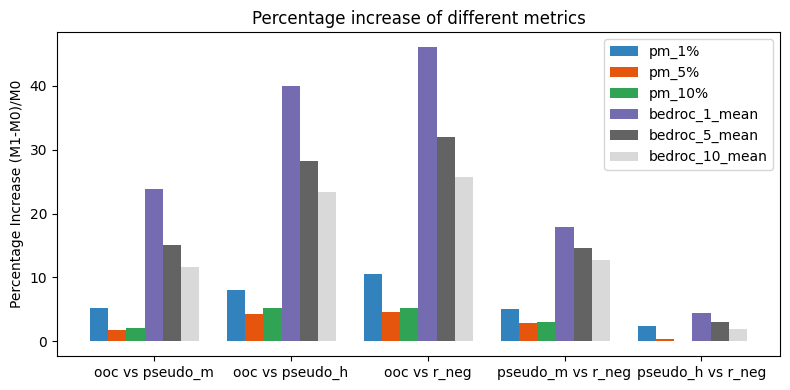

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Number of products
n_products = len(changes)

# Calculate indexes for positioning bars
bar_width = 0.8 / n_products  # Adjust bar width for stacking based on number of products
index = np.arange(len(groups))

# Define colors using the Pastel2 colormap for differentiation
colors = plt.colormaps.get_cmap('tab20c')(np.linspace(0, 1, n_products))

# Create a smaller figure
plt.figure(figsize=(8, 4))  # Adjust width and height values to make the plot smaller

# Plot each product's sales data
for i, (product_name, sales) in enumerate(changes.items()):
    plt.bar(index + i * bar_width, sales, bar_width, label=product_name, color=colors[i])

plt.ylabel('Percentage Increase (M1-M0)/M0')
plt.title('Percentage increase of different metrics')
plt.xticks(index + bar_width * n_products / 2, groups)
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
########### go binary
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/go_all/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,er_100_mean,er_1000_mean,er_10%,er_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,random_negativeauroc,0.05,0.227,0.494,0.005,0.013,0.745,0.003,0.004,0.617,0.795,0.771,0.701,0.789,0.211,0.117,0.259,0.353,0.54


In [4]:
########### ppi all
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_all_method_ooc_rn/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,er_100_mean,er_1000_mean,er_10%,er_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
1,random_negativeauroc,0.109,0.392,0.717,0.007,0.012,0.876,0.003,0.004,0.806,0.886,0.860,0.740,0.889,0.111,0.239,0.442,0.548,0.717
0,ooc,0.064,0.287,0.593,0.005,0.011,0.819,0.003,0.004,0.715,0.851,0.824,0.725,0.852,0.149,0.162,0.334,0.436,0.624


In [38]:
final_result.loc[final_result.groupby('disease')['top_recall_25'].idxmax()]

,method,top_recall_25,top_recall_300,top_recall_10%,top_precision_10%,max_precision_10%,top_recall_30%,top_precision_30%,max_precision_30%,er_100,er_1000,er_10%,er_30%,auroc,rank_ratio,bedroc_1,bedroc_5,bedroc_10,bedroc_30,disease
1,random_negativeauroc,0.126316,0.494737,0.800000,0.007933,0.009916,0.915789,0.003027,0.003305,0.982799,0.933347,0.888907,0.753174,0.910472,0.08998,0.320720,0.536131,0.640165,0.783622,ICD10_C16
3,random_negativeauroc,0.180000,0.360000,0.760000,0.003922,0.005160,0.920000,0.001582,0.001720,0.976328,0.929163,0.881787,0.753363,0.926595,0.07364,0.260855,0.470371,0.585634,0.760121,ICD10_C18
4,ooc,0.216667,0.583333,0.900000,0.001735,0.001939,1.000000,0.000646,0.000646,0.787115,0.939515,0.898566,0.769318,0.963911,0.03620,0.333412,0.591671,0.710042,0.858008,ICD10_C23
6,ooc,0.254545,0.463636,0.732727,0.003882,0.005312,0.887273,0.001566,0.001771,0.983473,0.916433,0.874249,0.746014,0.882223,0.11800,0.338963,0.510661,0.592591,0.729254,ICD10_C43
8,ooc,0.088889,0.325000,0.505556,0.002247,0.004392,0.858333,0.001259,0.001464,0.774258,0.884373,0.827176,0.739668,0.849689,0.15050,0.167572,0.335078,0.425728,0.616956,ICD10_C45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,random_negativeauroc,0.127485,0.519883,0.871930,0.008556,0.009808,0.936842,0.003061,0.003269,0.985473,0.937653,0.897625,0.757606,0.943139,0.05734,0.334415,0.592962,0.699182,0.834462,ICD10_N17
137,random_negativeauroc,0.147143,0.503810,0.880952,0.009304,0.010558,0.990000,0.003484,0.003519,0.977619,0.937874,0.898298,0.767842,0.958859,0.04164,0.318722,0.562062,0.681723,0.843028,ICD10_N18
139,random_negativeauroc,0.084795,0.301754,0.623392,0.006051,0.009703,0.796491,0.002573,0.003234,0.975768,0.911392,0.860039,0.726440,0.839674,0.16068,0.197101,0.371089,0.471574,0.639676,ICD10_N46
141,random_negativeauroc,0.060985,0.238068,0.677273,0.011790,0.017419,0.890530,0.005168,0.005806,0.956132,0.902316,0.871282,0.748315,0.883370,0.11732,0.132228,0.325050,0.453184,0.669879,ICD10_N80


In [32]:
final_result.loc[final_result.groupby('disease')['top_recall_25'].idxmax()]['method'].value_counts()

method
random_negativeauroc    53
ooc                     19
Name: count, dtype: int64

In [34]:
final_result.loc[final_result.groupby('disease')['top_recall_10%'].idxmax()]['method'].value_counts()

method
random_negativeauroc    65
ooc                      7
Name: count, dtype: int64

In [36]:
final_result.loc[final_result.groupby('disease')['bedroc_1'].idxmax()]['method'].value_counts()

method
random_negativeauroc    65
ooc                      7
Name: count, dtype: int64

In [6]:
########### ppi all
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_all_method/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False).round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,er_100_mean,er_1000_mean,er_10%,er_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,ooc,0.000,0.000,0.600,0.005,0.011,0.823,0.003,0.004,0.000,0.000,0.000,0.000,0.853,0.148,1.000,1.000,1.000,1.000
1,pseudo_labeling1auroc,0.113,0.385,0.717,0.007,0.012,0.877,0.003,0.004,0.822,0.885,0.861,0.739,0.885,0.114,0.234,0.434,0.542,0.712
3,random_negativeauroc,0.108,0.378,0.696,0.007,0.012,0.862,0.003,0.004,0.799,0.881,0.852,0.735,0.877,0.123,0.230,0.427,0.531,0.699
2,pseudo_on_vectorauroc,0.094,0.345,0.653,0.006,0.012,0.843,0.003,0.004,0.798,0.868,0.842,0.731,0.866,0.134,0.206,0.391,0.493,0.667


In [16]:
final_result = final_result[final_result['method'] != 'ooc']

In [26]:
disease_detaile = final_result.loc[final_result.groupby('disease')['bedroc_30'].idxmax()]

In [27]:
disease_detaile

,method,top_recall_25,top_recall_300,top_recall_10%,top_precision_10%,max_precision_10%,top_recall_30%,top_precision_30%,max_precision_30%,er_100,er_1000,er_10%,er_30%,auroc,rank_ratio,bedroc_1,bedroc_5,bedroc_10,bedroc_30,disease
11,random_negativeauroc,0.105263,0.505263,0.821053,0.008142,0.009916,0.894737,0.002957,0.003305,0.982431,0.932538,0.891932,0.748313,0.914372,0.08608,0.298838,0.540691,0.644472,0.781761,ICD10_C16
130,random_negativeauroc,0.100000,0.380000,0.740000,0.003818,0.005160,0.960000,0.001651,0.001720,0.969051,0.910663,0.877019,0.761063,0.923354,0.07688,0.214607,0.435880,0.558252,0.751952,ICD10_C18
44,random_negativeauroc,0.100000,0.583333,1.000000,0.001946,0.001946,1.000000,0.000649,0.000649,0.789053,0.942336,0.909248,0.769331,0.979575,0.02052,0.317972,0.626629,0.760355,0.902819,ICD10_C23
102,random_negativeauroc,0.236364,0.558182,0.790909,0.004233,0.005369,0.907273,0.001618,0.001790,0.988928,0.926472,0.886438,0.749873,0.919668,0.08056,0.396665,0.570648,0.654822,0.789512,ICD10_C43
162,pseudo_on_vectorauroc,0.088889,0.347222,0.622222,0.002782,0.004431,0.880556,0.001305,0.001477,0.980238,0.899932,0.858682,0.743993,0.864810,0.13538,0.202125,0.364384,0.462251,0.653373,ICD10_C45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,random_negativeauroc,0.138596,0.561988,0.871930,0.008556,0.009808,0.936257,0.003061,0.003269,0.983576,0.940811,0.897625,0.757493,0.942981,0.05748,0.328565,0.601700,0.708547,0.836786,ICD10_N17
242,random_negativeauroc,0.137619,0.553333,0.890952,0.009408,0.010558,0.980000,0.003449,0.003519,0.977787,0.935117,0.899608,0.765838,0.956864,0.04364,0.312451,0.566033,0.682058,0.839260,ICD10_N18
114,random_negativeauroc,0.095906,0.310526,0.611696,0.005947,0.009703,0.795322,0.002573,0.003234,0.977644,0.900815,0.857113,0.725761,0.855579,0.14476,0.212797,0.372171,0.468085,0.643387,ICD10_N46
187,random_negativeauroc,0.067045,0.232386,0.653030,0.011365,0.017419,0.890152,0.005168,0.005806,0.954578,0.897408,0.866363,0.748307,0.871198,0.12946,0.142894,0.312768,0.435955,0.653257,ICD10_N80


In [28]:
check_list = disease_detaile[disease_detaile['method'] == 'pseudo_labeling1auroc']['disease'].to_list()

In [29]:
final_result[final_result['disease'].isin(check_list)]

,method,top_recall_25,top_recall_300,top_recall_10%,top_precision_10%,max_precision_10%,top_recall_30%,top_precision_30%,max_precision_30%,er_100,er_1000,er_10%,er_30%,auroc,rank_ratio,bedroc_1,bedroc_5,bedroc_10,bedroc_30,disease
22,pseudo_labeling1auroc,0.140000,0.433333,0.846667,0.002360,0.002771,0.926667,0.000855,0.000923,0.782710,0.923637,0.891631,0.754178,0.946886,0.05326,0.272475,0.513145,0.641207,0.812321,ICD10_D83
23,pseudo_on_vectorauroc,0.066667,0.473333,0.806667,0.002258,0.002771,0.960000,0.000889,0.000923,0.781203,0.928320,0.880184,0.760959,0.914113,0.08604,0.211425,0.524152,0.635011,0.777463,ICD10_D83
24,random_negativeauroc,0.106667,0.400000,0.846667,0.002360,0.002771,0.966667,0.000889,0.000923,0.588623,0.928775,0.891619,0.762564,0.946358,0.05378,0.238437,0.478074,0.615427,0.805437,ICD10_D83
38,pseudo_labeling1auroc,0.100000,0.348889,0.828889,0.004126,0.004951,0.955556,0.001581,0.001650,0.588989,0.933660,0.891089,0.760807,0.940205,0.06006,0.178765,0.458117,0.606511,0.797391,ICD10_E84
39,pseudo_on_vectorauroc,0.104444,0.288889,0.682222,0.003404,0.004952,0.891111,0.001478,0.001650,0.968828,0.914928,0.868542,0.746545,0.899125,0.10110,0.184117,0.381926,0.499599,0.692484,ICD10_E84
40,random_negativeauroc,0.082222,0.371111,0.831111,0.004127,0.004952,0.913333,0.001513,0.001650,0.780104,0.935322,0.891623,0.751752,0.924153,0.07608,0.201304,0.461961,0.598921,0.774330,ICD10_E84
108,pseudo_labeling1auroc,0.112500,0.412500,0.725000,0.006029,0.008316,0.900000,0.002495,0.002772,0.955225,0.917720,0.878136,0.749871,0.887740,0.11260,0.201688,0.424169,0.541362,0.718232,ICD10_N04
109,pseudo_on_vectorauroc,0.062500,0.200000,0.450000,0.003744,0.008320,0.762500,0.002114,0.002772,0.941242,0.861689,0.808528,0.713849,0.815410,0.18488,0.113432,0.242667,0.334100,0.539392,ICD10_N04
110,random_negativeauroc,0.125000,0.412500,0.750000,0.006240,0.008320,0.837500,0.002322,0.002772,0.975973,0.921673,0.881916,0.736378,0.877355,0.12298,0.243526,0.463622,0.569108,0.718159,ICD10_N04
137,pseudo_labeling1auroc,0.040000,0.320000,0.780000,0.002258,0.002874,0.960000,0.000924,0.000958,0.781199,0.904826,0.885137,0.760977,0.929395,0.07076,0.172905,0.365830,0.510895,0.743203,ICD10_C53


In [6]:
########### exp
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/exp/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,er_100_mean,er_1000_mean,er_10%,er_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,random_negativeauroc,0.017348,0.098152,0.325048,0.00261,0.007673,0.601754,0.001578,0.002557,0.304563,0.642916,0.68157,0.641549,0.710218,0.293481,0.045587,0.13693,0.213283,0.403693


In [4]:
########### biograd
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/biograd/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,er_100_mean,er_1000_mean,er_10%,er_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
1,random_negativeauroc,0.036731,0.145827,0.354272,0.003762,0.012791,0.572446,0.002275,0.004263,0.524098,0.678363,0.693515,0.624355,0.694007,0.306332,0.082817,0.175742,0.245608,0.412338
0,pseudo_labeling1auroc,0.036903,0.140745,0.316504,0.003542,0.012790,0.537871,0.002173,0.004262,0.502681,0.670352,0.653690,0.597961,0.674789,0.321136,0.078538,0.165187,0.228340,0.385874


In [8]:
########### ppi_15_neg
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_15_neg/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,er_100_mean,er_1000_mean,er_10%,er_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
1,random_negativeauroc,0.114787,0.408388,0.710296,0.008897,0.015005,0.876613,0.003945,0.005001,0.804657,0.881720,0.855149,0.739504,0.884188,0.116326,0.244073,0.444315,0.547850,0.712794
0,pseudo_labeling1auroc,0.105610,0.392461,0.716461,0.008891,0.015004,0.875093,0.003925,0.005000,0.817344,0.883213,0.864898,0.740100,0.885786,0.114658,0.236574,0.436207,0.542951,0.712359


In [6]:
########### ppi_10_neg
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_10_neg/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,er_100_mean,er_1000_mean,er_10%,er_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
1,random_negativeauroc,0.111671,0.403785,0.719435,0.007977,0.012932,0.882162,0.003474,0.00431,0.810997,0.893556,0.866384,0.741382,0.888289,0.112284,0.244372,0.446399,0.551513,0.718048
0,pseudo_labeling1auroc,0.107534,0.387681,0.715126,0.007895,0.012931,0.872225,0.003453,0.00431,0.804530,0.891967,0.863615,0.739230,0.882787,0.117669,0.233660,0.434555,0.540977,0.708981


In [4]:
########### ppi_700
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_700/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,er_100_mean,er_1000_mean,er_10%,er_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
1,random_negativeauroc,0.113270,0.358278,0.625153,0.007086,0.013881,0.803396,0.003363,0.004626,0.793374,0.848317,0.831202,0.718197,0.835875,0.164351,0.206033,0.377109,0.473178,0.638786
0,pseudo_labeling1auroc,0.106966,0.333278,0.614680,0.006991,0.013878,0.793981,0.003326,0.004625,0.799595,0.843108,0.820937,0.711783,0.830854,0.168360,0.196808,0.361928,0.458970,0.627656


In [4]:
########### seq
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/seq/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,random_negativeauroc,0.03482,0.167812,0.3858,0.004251,0.01208,0.632799,0.002449,0.004026,0.724172,0.276675,0.090521,0.197534,0.273171,0.448443


In [19]:
########### ppi_dsi_o.5
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_dsi_0.5/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,random_negativeauroc,0.058249,0.243127,0.495582,0.003935,0.009111,0.711746,0.001941,0.003037,0.77961,0.220115,0.141354,0.281452,0.365922,0.535403


In [16]:
########### SCGPT
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/exp_scgpt/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
1,random_negativeauroc,0.036422,0.187855,0.368930,0.005363,0.015766,0.622678,0.003155,0.005253,0.724071,0.278593,0.074761,0.178434,0.255584,0.437107
0,pseudo_labeling1auroc,0.013333,0.067619,0.107619,0.001457,0.013481,0.107619,0.000486,0.004494,0.560764,0.542440,0.023256,0.055423,0.077386,0.229792


In [14]:
########### text_bioconcept
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/txt_bioconcept/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
0,random_negativeauroc,0.129754,0.391017,0.636321,0.009022,0.015766,0.817056,0.004048,0.005253,0.844262,0.155686,0.201072,0.366271,0.466722,0.642394


In [12]:
########### ppi
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
1,random_negativeauroc,0.111251,0.391424,0.733125,0.007464,0.011663,0.882054,0.003178,0.003887,0.891854,0.108321,0.239522,0.444088,0.553105,0.722319
0,pseudo_labeling1auroc,0.101431,0.384570,0.718103,0.007115,0.011662,0.873389,0.003073,0.003887,0.885136,0.116332,0.227630,0.433197,0.541247,0.710617


In [9]:
########### ppi_400
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_400/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)

,method,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
1,random_negativeauroc,0.706660,0.006912,0.011475,0.855044,0.003025,0.003824,0.877891,0.122782,0.252421,0.443206,0.543675,0.704927
0,pseudo_labeling1auroc,0.687934,0.006246,0.011474,0.850468,0.002704,0.003824,0.871306,0.132821,0.224859,0.417041,0.520185,0.689872


In [29]:
########### Gene2vec
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/exp/all_disease_12.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)

,method,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
2,pseudo_labeling2,0.234227,0.002964,0.017929,0.487850,0.002129,0.005975,0.647975,0.362912,0.055065,0.113014,0.168554,0.336653
3,random_negative,0.217057,0.003420,0.017862,0.505980,0.002681,0.005953,0.637418,0.362788,0.045982,0.100189,0.152631,0.316446
1,pseudo_labeling1,0.233893,0.003085,0.017928,0.447814,0.002142,0.005975,0.633121,0.376830,0.044239,0.108549,0.161238,0.318603
0,ooc,0.168039,0.002717,0.016349,0.427466,0.002200,0.005449,0.577923,0.422228,0.015003,0.061127,0.106775,0.253419


In [ ]:
########### Gene2vec
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/exp/all_disease.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)

,method,recall_mean,precision_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
2,pseudo_labeling2,0.066318,0.011398,0.222292,0.002852,0.016235,0.457569,0.002026,0.005411,0.628925,0.380277,0.041893,0.098223,0.151196,0.313668
1,pseudo_labeling1,0.044944,0.002597,0.214106,0.002794,0.016235,0.431853,0.002011,0.005410,0.626191,0.386058,0.039937,0.094666,0.144826,0.306127
3,random_negative,0.033227,0.024195,0.218236,0.003192,0.016174,0.473390,0.002427,0.005390,0.627768,0.373456,0.038848,0.094770,0.148719,0.310685
0,ooc,0.288673,0.002007,0.184212,0.002413,0.014477,0.429670,0.001959,0.004824,0.584933,0.415206,0.017176,0.066435,0.116003,0.267427


In [ ]:
########### ppi
final_result = pd.read_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/ppi_pseudo12/all_disease_12.csv')
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)

,method,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
4,pseudo_labeling_mlp,0.757895,0.007515,0.009915,0.894737,0.002956,0.003304,0.897777,0.102660,0.315726,0.524241,0.618178,0.759949
5,pseudo_labeling_rf,0.757895,0.007515,0.009915,0.894737,0.002956,0.003304,0.897777,0.102660,0.315726,0.524241,0.618178,0.759949
6,pseudo_labeling_svm,0.757895,0.007515,0.009915,0.894737,0.002956,0.003304,0.897777,0.102660,0.315726,0.524241,0.618178,0.759949
3,"pseudo_labeling_['svm', 'rf', 'mlp']",0.778947,0.007724,0.009915,0.873684,0.002887,0.003304,0.877246,0.123160,0.281165,0.487254,0.590676,0.739007
8,"random_negative_['svm', 'rf', 'mlp']",0.736842,0.007307,0.009916,0.842105,0.002783,0.003305,0.873388,0.127020,0.274336,0.486363,0.578326,0.717398
7,random_negative,0.768437,0.007189,0.010089,0.902991,0.002965,0.003363,0.906043,0.094380,0.248295,0.461989,0.575085,0.744528
1,pseudo_labeling1,0.763401,0.006916,0.010088,0.914473,0.002944,0.003362,0.911986,0.088427,0.242012,0.445756,0.562045,0.742030
2,pseudo_labeling2,0.736504,0.006919,0.010088,0.907158,0.002920,0.003362,0.903524,0.097471,0.230749,0.445191,0.559836,0.737354
0,ooc,0.623275,0.005069,0.009527,0.818554,0.002434,0.003175,0.859066,0.141271,0.162527,0.345383,0.451662,0.638369


In [14]:
all_sum = create_summary(final_result,'method')
# all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)[['method','auroc_mean',
#        'rank_ratio_mean', 'bedroc_1_mean', 'bedroc_5_mean', 'bedroc_10_mean',
#        'bedroc_30_mean']]

all_sum.loc[:, ~all_sum.columns.str.contains('std', case=False)].sort_values(by=['bedroc_1_mean'],ascending=False)

,method,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean
7,random_negative_svm,0.711792,0.007360,0.011774,0.879687,0.003174,0.003924,0.888192,0.112461,0.233003,0.436459,0.543138,0.713374
3,pseudo_labeling_svm,0.707064,0.007210,0.011773,0.877234,0.003173,0.003924,0.886701,0.113627,0.221764,0.424870,0.533545,0.707325
4,"random_negative_['svm', 'rf', 'mlp']",0.640809,0.006836,0.011774,0.818996,0.002985,0.003924,0.850374,0.150021,0.205957,0.387084,0.486231,0.654642
0,"pseudo_labeling_['svm', 'rf', 'mlp']",0.652513,0.006721,0.011773,0.808084,0.002951,0.003924,0.846259,0.154130,0.201007,0.388006,0.489049,0.654094
2,pseudo_labeling_rf,0.550133,0.005718,0.011773,0.731693,0.002602,0.003924,0.786119,0.216262,0.172979,0.327428,0.413968,0.572849
6,random_negative_rf,0.528706,0.005847,0.011774,0.719672,0.002693,0.003924,0.784217,0.218327,0.167414,0.317836,0.402331,0.561665
5,random_negative_mlp,0.277398,0.005104,0.011774,0.543084,0.002644,0.003924,0.679522,0.320804,0.051727,0.125580,0.189780,0.362989
1,pseudo_labeling_mlp,0.289215,0.004976,0.011773,0.566409,0.002630,0.003924,0.692559,0.307768,0.049503,0.125148,0.192026,0.373291


In [5]:
icd_dict = {
    'Certain infectious and parasitic diseases': ['A00','B99'],
    'Neoplasms': ['C00','D48'],
    'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism': ['D50','D89'],
    'Endocrine, nutritional and metabolic diseases': ['E00','E90'],
    'Mental and behavioural disorders': ['F00','F99'],
    'Diseases of the nervous system': ['G00','G99'],
    'Diseases of the eye and adnexa': ['H00','H59'],
    'Diseases of the ear and mastoid process': ['H60','H95'],
    'Diseases of the circulatory system': ['I00','I99'],
    'Diseases of the respiratory system': ['J00','J99'],
    'Diseases of the digestive system': ['K00','K93'],
    'Diseases of the skin and subcutaneous tissue': ['L00','L99'],
    'Diseases of the musculoskeletal system and connective tissue': ['M00','M99'],
    'Diseases of the genitourinary system': ['N00','N99']
}

In [6]:
def find_disease_category(icd_code):
    icd_num = icd_code.split('_')[1]  # Extract ICD-10 code
    # print(icd_num)
    icd_letter = icd_num[0]  # Extract first letter (C, D, etc.)
    icd_number = int(icd_num[1:])  # Extract numeric part

    for category, (start, end) in icd_dict.items():
        start_letter, start_num = start[0], int(start[1:])
        end_letter, end_num = end[0], int(end[1:])

        if start_letter <= icd_letter <= end_letter:  # Ensure it's within the letter range
            if start_letter == icd_letter and start_num <= icd_number:
                return category
            if end_letter == icd_letter and icd_number <= end_num:
                return category
            if start_letter < icd_letter < end_letter:
                return category  # Covers ranges like C00-D48
        
    return 'Unknown Category'

results = final_result
# Mapping results to disease categories
mapped_results = {icd: find_disease_category(icd) for icd in results['disease']}
results['category'] = results['disease'].map(mapped_results)


In [11]:
results['category'].unique()

array(['Neoplasms',
       'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
       'Endocrine, nutritional and metabolic diseases',
       'Mental and behavioural disorders',
       'Diseases of the nervous system', 'Diseases of the eye and adnexa',
       'Diseases of the circulatory system',
       'Diseases of the respiratory system',
       'Diseases of the digestive system',
       'Diseases of the skin and subcutaneous tissue',
       'Diseases of the musculoskeletal system and connective tissue',
       'Diseases of the genitourinary system'], dtype=object)

In [12]:
collected_dfs = []
disease_num = dict()
for category in results['category'].unique().tolist():
    subdf = results[results['category'] == category].copy()
    sum_df = create_summary(subdf,'method')
    sum_df['category'] = category  #
    collected_dfs.append(sum_df)
    disease_num[category] = len(subdf)/2

# Concatenate all collected sub-dataframes into one
final_df = pd.concat(collected_dfs, ignore_index=True)

In [13]:
final_df

,method,top_recall_25_mean,top_recall_25_std,top_recall_300_mean,top_recall_300_std,top_recall_10_mean,top_recall_10_std,top_precision_10_mean,top_precision_10_std,max_precision_10_mean,...,rank_ratio_std,bedroc_1_mean,bedroc_1_std,bedroc_5_mean,bedroc_5_std,bedroc_10_mean,bedroc_10_std,bedroc_30_mean,bedroc_30_std,category
0,ooc,0.106990,0.094226,0.364921,0.180669,0.641126,0.154578,0.005356,0.003649,0.013889,...,0.095608,0.213721,0.122857,0.391371,0.163168,0.489938,0.172590,0.663733,0.158195,Neoplasms
1,random_negativeauroc,0.125943,0.079839,0.420318,0.166020,0.716928,0.133654,0.006951,0.004751,0.015407,...,0.092303,0.266493,0.107950,0.458804,0.145610,0.558269,0.155887,0.717225,0.148098,Neoplasms
2,ooc,0.059167,0.068981,0.331667,0.165227,0.724167,0.095219,0.001684,0.000102,0.002296,...,0.058411,0.157891,0.080702,0.383938,0.118609,0.505155,0.129728,0.697077,0.115889,Diseases of the blood and blood-forming organs...
3,random_negativeauroc,0.102500,0.077621,0.422500,0.087321,0.801667,0.110265,0.001871,0.000141,0.002307,...,0.086111,0.230240,0.054841,0.480959,0.095849,0.601394,0.120430,0.767951,0.125772,Diseases of the blood and blood-forming organs...
4,ooc,0.041190,0.014527,0.221557,0.031433,0.536976,0.055544,0.009573,0.003157,0.018869,...,0.034184,0.137418,0.017724,0.283432,0.043771,0.385949,0.054092,0.594289,0.056891,"Endocrine, nutritional and metabolic diseases"
5,random_negativeauroc,0.100143,0.035582,0.393121,0.043450,0.810176,0.048172,0.015355,0.004055,0.019874,...,0.027365,0.252467,0.047914,0.471450,0.047523,0.595713,0.056941,0.774381,0.054291,"Endocrine, nutritional and metabolic diseases"
6,ooc,0.009202,0.011811,0.080656,0.062438,0.356381,0.105612,0.008618,0.008166,0.023618,...,0.053798,0.046926,0.042682,0.137141,0.057143,0.225681,0.070098,0.437603,0.081446,Mental and behavioural disorders
7,random_negativeauroc,0.041414,0.034541,0.193198,0.108454,0.433066,0.136790,0.015611,0.012244,0.027924,...,0.079164,0.145580,0.107444,0.240320,0.127697,0.319847,0.140728,0.502424,0.136977,Mental and behavioural disorders
8,ooc,0.030641,0.022096,0.206009,0.084331,0.499710,0.133966,0.005023,0.001855,0.009019,...,0.068626,0.110771,0.054535,0.264930,0.106202,0.361014,0.128559,0.559209,0.129612,Diseases of the nervous system
9,random_negativeauroc,0.071031,0.046291,0.320239,0.175387,0.665883,0.119706,0.006853,0.002171,0.009264,...,0.078435,0.176775,0.105502,0.373857,0.150140,0.485269,0.156859,0.668819,0.137904,Diseases of the nervous system


In [14]:
# best_methods = final_df.loc[final_df.groupby('category')['rank_ratio_mean'].idxmin()]
best_methods = final_df.loc[final_df.groupby('category')['bedroc_10_mean'].idxmax()]
# best_methods = final_df.loc[final_df.groupby('category')['top_recall_10_mean'].idxmax()]


In [ ]:
show = best_methods.loc[:, ~best_methods.columns.str.contains('std', case=False)].sort_values(by=['bedroc_10_mean'],ascending=False)
# show = best_methods.loc[:, ~best_methods.columns.str.contains('std', case=False)].sort_values(by=['top_recall_10_mean'],ascending=False)
# show = best_methods.loc[:, ~best_methods.columns.str.contains('std', case=False)].sort_values(by=['rank_ratio_mean'])
show['disease_num'] = show['category'].map(disease_num).astype('int')
show.round(3)

,method,top_recall_25_mean,top_recall_300_mean,top_recall_10_mean,top_precision_10_mean,max_precision_10_mean,top_recall_30_mean,top_precision_30_mean,max_precision_30_mean,er_100_mean,...,er_10%,er_30%,auroc_mean,rank_ratio_mean,bedroc_1_mean,bedroc_5_mean,bedroc_10_mean,bedroc_30_mean,category,disease_num
13,random_negativeauroc,0.188,0.509,0.834,0.007,0.008,0.955,0.003,0.003,0.943,...,0.891,0.760,0.942,0.058,0.332,0.557,0.664,0.814,Diseases of the circulatory system,10
17,random_negativeauroc,0.153,0.510,0.828,0.004,0.005,0.945,0.002,0.002,0.979,...,0.891,0.758,0.939,0.061,0.303,0.547,0.660,0.812,Diseases of the digestive system,3
3,random_negativeauroc,0.102,0.422,0.802,0.002,0.002,0.909,0.001,0.001,0.688,...,0.880,0.748,0.911,0.089,0.230,0.481,0.601,0.768,Diseases of the blood and blood-forming organs...,4
19,random_negativeauroc,0.130,0.402,0.769,0.004,0.006,0.946,0.002,0.002,0.900,...,0.849,0.759,0.926,0.074,0.263,0.486,0.600,0.772,Diseases of the skin and subcutaneous tissue,5
5,random_negativeauroc,0.100,0.393,0.810,0.015,0.020,0.936,0.006,0.007,0.929,...,0.890,0.758,0.927,0.074,0.252,0.471,0.596,0.774,"Endocrine, nutritional and metabolic diseases",4
23,random_negativeauroc,0.112,0.441,0.760,0.007,0.010,0.894,0.003,0.003,0.975,...,0.881,0.748,0.900,0.101,0.266,0.484,0.590,0.749,Diseases of the genitourinary system,6
1,random_negativeauroc,0.126,0.420,0.717,0.007,0.015,0.864,0.003,0.005,0.869,...,0.865,0.737,0.882,0.118,0.266,0.459,0.558,0.717,Neoplasms,15
15,random_negativeauroc,0.079,0.443,0.720,0.008,0.010,0.845,0.003,0.003,0.718,...,0.872,0.735,0.877,0.120,0.216,0.453,0.557,0.711,Diseases of the respiratory system,3
21,random_negativeauroc,0.058,0.308,0.679,0.004,0.005,0.874,0.001,0.002,0.625,...,0.860,0.741,0.887,0.114,0.160,0.370,0.491,0.687,Diseases of the musculoskeletal system and con...,5
9,random_negativeauroc,0.071,0.320,0.666,0.007,0.009,0.844,0.003,0.003,0.714,...,0.852,0.731,0.867,0.133,0.177,0.374,0.485,0.669,Diseases of the nervous system,9


In [23]:
show['disease_num'].sum()

72

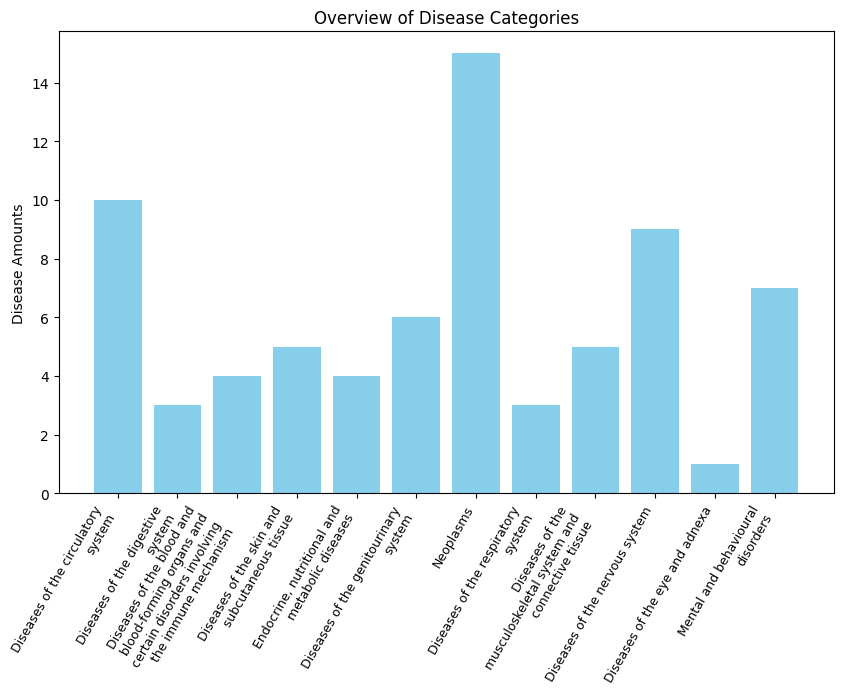

In [39]:
import matplotlib.pyplot as plt
from textwrap import wrap

# Applying text wrap for multi-line labels
wrapped_labels = [ '\n'.join(wrap(label, width=30)) for label in show['category']]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(wrapped_labels, show['disease_num'], color='skyblue')
plt.xticks(rotation=60, fontsize=9,ha='right')

plt.ylabel('Disease Amounts')
plt.title('Overview of Disease Categories')

# Show the plot
plt.show()


In [49]:
show.round(3).to_csv('/itf-fi-ml/shared/users/ziyuzh/svm/results/temp.csv')

In [88]:
# Define the path where you want to save the Excel file
file_path = os.path.join(root,'results_category.xlsx')

# Use ExcelWriter to save multiple sheets
with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    show.to_excel(writer, sheet_name='max_bedroc1', index=False)
    all_sum.to_excel(writer, sheet_name='all_Sum', index=False)